In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
LSKmix= np.array(pd.read_csv ('../data/processed_data/LSKmix.csv'))
y = np.array(LSKmix[:,-1],dtype=int)
LSKmix= LSKmix[:,0:-1]


In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(LSKmix,y)

In [5]:
print(LSKmix.shape, len(pred))
acc = model.score_
print(acc)

(1023, 666) 1023
0.0871694417238002


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (89.0, 932.0, 0.09549356223175966, 0.2109004739336493, 0.994269587619358, 0.0871694417238002, 0.997944977228126, 0.9128305582761999, 0.7890995260663507)


# Mutual information maximizer (MIM)

test 0.21437003975353033 0.009235477946311492
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (121.0, 929.0, 0.1302475780409042, 0.28809523809523807, 0.993696267294552, 0.11523809523809524, 0.9979624241020014, 0.8847619047619047, 0.7119047619047619)


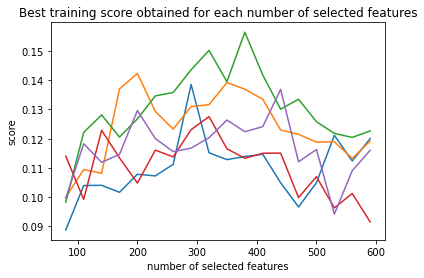

In [7]:
#Define parameters for MIM method
N = np.arange(80,600,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LSKmix, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LSKmix[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Anova F test

test 0.23516501113680083 0.03204341595117525
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (119.0, 876.0, 0.1358447488584475, 0.2603938730853392, 0.9949232400855399, 0.11959798994974874, 0.9980350322359357, 0.8804020100502512, 0.7396061269146609)


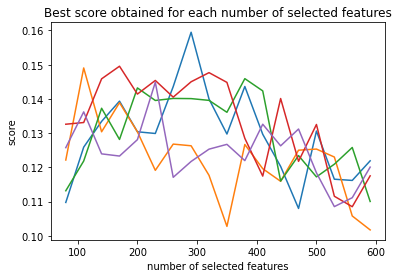

In [8]:
#Define parameters for ANOVA method
N = np.arange(80,600,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LSKmix, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LSKmix[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

# Hybrid methods

# Mutual information and stimulated annealing

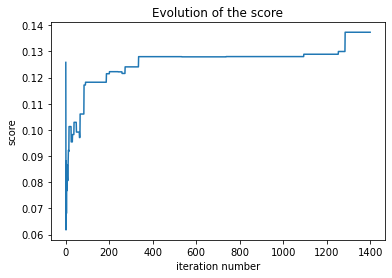

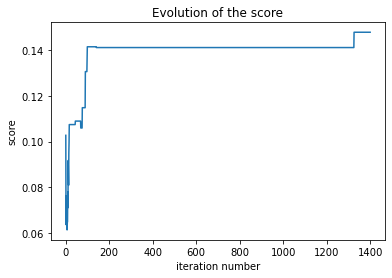

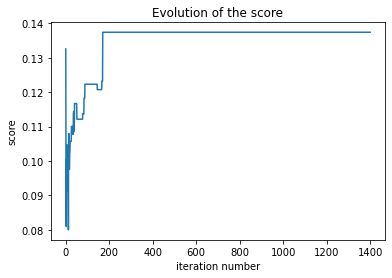

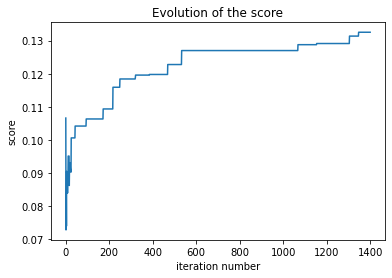

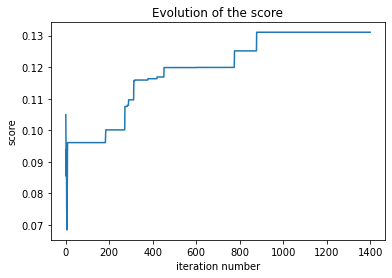

test 0.1725641104361047 0.035212279330322255
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (112.0, 945.0, 0.11851851851851852, 0.31728045325779036, 0.9929887300327193, 0.10596026490066225, 0.9982025522266723, 0.8940397350993378, 0.6827195467422096)


In [9]:
#Define parameters for MI + stimulated annealing method
N = np.array([400])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.1, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LSKmix, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LSKmix[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [ ]:
#Define parameters for MI + genetic algorithm method
N = np.array([400])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LSKmix, FamiliesClusters, compute_precision,True, 5,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LSKmix[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 